# Implementing KNN/SVM for 6 classes 

## Importing Modules necessary

In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import pandas as pd 
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm ,neighbors
from pylab import * 

## Preprocessing of Data, from nanotaglistsortednorm.csv

In [2]:
df1 = pd.read_csv("nanotaglistsortednorm.csv")
dictLabel = {'b001':1,'b010':2,'b100':3,'b101':4,'b110':5,'b111':6}
df1 = df1.query('code == "b001" or code =="b010" or code == "b100" or code == "b101" or code == "b110" or code == "b111"')
labels = df1['code']

## Checking the number of datapoints in each class

In [3]:
new_labels = [dictLabel[l] for l in labels]
class_count = { 1: 0, 2: 0, 3:0 , 4:0 , 5:0, 6:0}
for l in new_labels:
    class_count[l] += 1

## Splitting it into test and train Data

In [4]:
X=df1[['F','Br','I']]
y=new_labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

## SVM Model Fit

In [5]:
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.15, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

svclassifier = SVC(kernel='rbf',C = 10.0, gamma = 1.0)
svclassifier.fit(X, y) 
y_pred = svclassifier.predict(X)  

# print("The best parameters are %s with a score of %0.2f"
#       % (grid.best_params_, grid.best_score_))


## K-NN Model fit for 2 to 4 neighbours

In [6]:
neigh = neighbors.KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
y_pred = neigh.predict(X)
acc_test = 100*np.sum(y_pred == y)/len(y)
# print(confusion_matrix(y, y_pred))  
# print(classification_report(y, y_pred)) 

## Defining plotting functions

In [7]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Plotting of data

<class 'pandas.core.frame.DataFrame'>


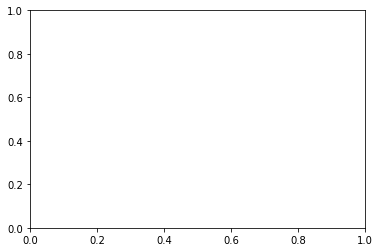

In [8]:
# data to plot
print(type(X))
X = np.array(X)
X0 = X[:, 0]

n_groups = 6
manual = (21,14,14,10,7,16)
SVM = (21,14,13,10,3,16)
kmeans_2 = (21,12,12,10,5,15)
kmeans_3 = (21,14,13,8,5,15) 
kmeans_4 = (14,20,12,13,8,3,14)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8


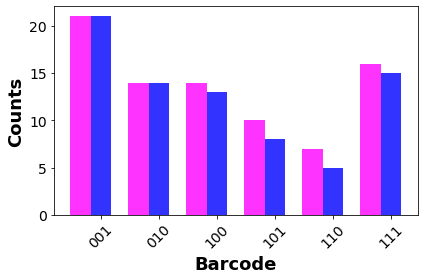

In [9]:
rects1 = plt.bar(index, manual, bar_width,
alpha=opacity,
color='magenta',
label='Manual')

rects2 = plt.bar(index + bar_width, kmeans_3, bar_width,
alpha=opacity,
color='blue',
label='Kmeans_3')

plt.xlabel('Barcode',fontweight = 'bold',fontsize = 18)
plt.ylabel('Counts',fontweight = 'bold',fontsize = 18)
#plt.title('Bar plot')
plt.xticks(index + bar_width, ('001', '010', '100','101','110','111'))


plt.yticks(np.arange(5), ('0', '5','10','15','20' ))
fontsize = 14
ax = gca()

ax.set_xticklabels(['001', '010', '100','101','110','111'], minor=False, rotation=45)
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
   # tick.label1.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(fontsize)
  #  tick.label1.set_fontweight('bold')
for axis in [ax.yaxis]:
    axis.set_major_locator(plt.MaxNLocator(5))

plt.tight_layout()
plt.show()